In [107]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

Sort the Dataset by Aggregate Score: First, sort the dataset based
on the sum of the grades (G1 + G2 + G3) in descending order, so
that students with the highest aggregate scores are listed first.

In [108]:
# Load the dataset (update the path if needed)
data = pd.read_csv('student-por1.csv', sep=';') 

# Calculate the aggregate score by summing G1, G2, and G3
data['Aggregate Score'] = data[['G1', 'G2', 'G3']].sum(axis=1)

# Sort the dataset by Aggregate Score in descending order
ordered_data = data.sort_values(by='Aggregate Score', ascending=False)

# Reset the index for better readability
ordered_data.reset_index(drop=True, inplace=True)

In [109]:
# Display the ordered dataset 
ordered_data[['Aggregate Score', 'G1', 'G2', 'G3']].head() 

,Aggregate Score,G1,G2,G3
0,56,18,19,19
1,54,19,17,18
2,54,18,18,18
3,54,18,18,18
4,54,17,18,19


Create the Binary Label Column: After sorting the dataset, create
the binary column pass, which indicates whether the student has
passed (sum of G1, G2, and G3 >= 35). Drop the original grade
columns (G1, G2, G3) as before.

In [110]:
# Create the binary label column 'pass'
ordered_data['pass'] = (ordered_data['Aggregate Score'] >= 35).astype(int)

# Drop the original grade columns G1, G2, and G3
ordered_data.drop(['G1', 'G2', 'G3'], axis=1, inplace=True)

# Display the first few rows to verify the changes
ordered_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Aggregate Score,pass
0,GP,F,17,R,LE3,T,3,1,services,other,...,no,3,1,2,1,1,3,0,56,1
1,MS,F,18,U,LE3,T,1,1,at_home,services,...,no,5,3,2,1,1,4,0,54,1
2,GP,F,17,U,GT3,T,3,2,health,health,...,no,5,2,2,1,2,5,0,54,1
3,MS,F,18,U,GT3,T,4,4,teacher,teacher,...,no,4,3,5,1,2,1,0,54,1
4,MS,M,18,U,GT3,T,4,4,teacher,teacher,...,no,3,2,4,1,4,2,4,54,1


Split the Ordered Dataset: Split the ordered dataset into a training
set (first 500 rows) and a testing set (remaining rows). Do not
shuffle the data; the rows should remain in order according to their
aggregate scores

In [111]:
# Split the ordered dataset into training and testing sets
train_data = ordered_data.iloc[:500]  # First 500 rows for training
test_data = ordered_data.iloc[500:]    # Remaining rows for testing

# Separate features and labels for the training set
X_train = train_data.drop('pass', axis=1)  # Features
y_train = train_data['pass']                 # Labels

# Separate features and labels for the testing set
X_test = test_data.drop('pass', axis=1)    
y_test = test_data['pass']                   

In [112]:
# One-hot encoding for categorical variables
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Align the training and testing sets to ensure they have the same columns
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

Train the Model on Ordered Data: Train a decision tree classifier on
the unshuffled, ordered data using the training set. Use the
provided code to create the model. For consistency, use
max_depth=5 and the entropy criterion.

In [113]:
# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(max_depth=5, criterion='entropy')

# Train the model on the encoded training data
model.fit(X_train_encoded, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

Evaluate the Model on Unshuffled Data: Test the model on the
unshuffled, ordered testing set.

In [114]:
# Make predictions on the encoded testing set
y_pred = model.predict(X_test_encoded)

# Calculate and display the accuracy on the testing set
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on Unshuffled Testing Set: {accuracy:.4f}')

Accuracy on Unshuffled Testing Set: 1.0000


Perform 5-fold cross-validation on the entire unshuffled dataset
(training and testing combined). Record the accuracy scores and
cross-validation results.

In [115]:
# Combine the training and testing datasets for cross-validation
combined_data = pd.concat([train_data, test_data], ignore_index=True)

# Separate features and labels for the combined dataset
X_combined = combined_data.drop('pass', axis=1)  
y_combined = combined_data['pass']                 

# One-hot encoding for categorical variables in the combined dataset
X_combined_encoded = pd.get_dummies(X_combined, drop_first=True)

# Initialize the Decision Tree Classifier
model_cv = DecisionTreeClassifier(max_depth=5, criterion='entropy')

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model_cv, X_combined_encoded, y_combined, cv=5)

What is the accuracy of the model on the testing set?

In [116]:
# Make predictions on the encoded testing set
y_pred = model.predict(X_test_encoded)

# Calculate and display the accuracy on the testing set
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on Testing Set: {accuracy:.4f}')


Accuracy on Testing Set: 1.0000


What is the mean cross-validation accuracy, and what are the
variations across folds?

In [117]:
# Display the cross-validation results
print("Cross-Validation Accuracy Scores:", cv_scores)
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}')

Cross-Validation Accuracy Scores: [0.80769231 1.         1.         1.         0.82170543]
Mean Cross-Validation Accuracy: 0.9259
Standard Deviation of Cross-Validation Accuracy: 0.0909


Train the Decision Tree for Different max_depth Values: Start by
training decision trees with max_depth values of 3, 4, and 5. For
each value of max_depth, tune the min_samples_split parameter by
trying several values (e.g., 2,3,4,5,...20), or maybe (2,10,20,50).

In [118]:
# Combine the training and testing datasets
combined_data = ordered_data.copy()

# Separate features and labels for the combined dataset
X_combined = combined_data.drop('pass', axis=1)  # Features
y_combined = combined_data['pass']                 # Labels

# One-hot encoding for categorical variables in the combined dataset
X_combined_encoded = pd.get_dummies(X_combined, drop_first=True)

In [119]:
# Initialize lists to store results
results = []

# Define the ranges for max_depth and min_samples_split
max_depth_values = [3, 4, 5]
min_samples_split_values = [2, 5, 10, 20]

# Loop through different max_depth values
for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        # Initialize the Decision Tree Classifier
        model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, criterion='entropy')
        
        # Fit the model
        model.fit(X_combined_encoded, y_combined)
        
        # Make predictions
        y_pred = model.predict(X_combined_encoded)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_combined, y_pred)
        
        # Store the results
        results.append({
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'accuracy': accuracy
        })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

results_df

,max_depth,min_samples_split,accuracy
0,3,2,1.0
1,3,5,1.0
2,3,10,1.0
3,3,20,1.0
4,4,2,1.0
5,4,5,1.0
6,4,10,1.0
7,4,20,1.0
8,5,2,1.0
9,5,5,1.0


For each max_depth, how does tuning min_samples_split affect the
performance of the model? At which combination of max_depth and
min_samples_split does the model perform best on the testing set?
Do higher values of min_samples_split reduce overfitting?

In [120]:
# Find the best performing combination
best_params = results_df.loc[results_df['accuracy'].idxmax()]

# Display the results
print(f'Best combination: max_depth={best_params["max_depth"]}, min_samples_split={best_params["min_samples_split"]}, Accuracy={best_params["accuracy"]:.4f}')

Best combination: max_depth=3.0, min_samples_split=2.0, Accuracy=1.0000


In [121]:
# Analyze the impact of min_samples_split on performance for each max_depth
for max_depth in max_depth_values:
    subset = results_df[results_df['max_depth'] == max_depth]
    print(f'\nFor max_depth={max_depth}:')
    print(subset)


For max_depth=3:
   max_depth  min_samples_split  accuracy
0          3                  2       1.0
1          3                  5       1.0
2          3                 10       1.0
3          3                 20       1.0

For max_depth=4:
   max_depth  min_samples_split  accuracy
4          4                  2       1.0
5          4                  5       1.0
6          4                 10       1.0
7          4                 20       1.0

For max_depth=5:
    max_depth  min_samples_split  accuracy
8           5                  2       1.0
9           5                  5       1.0
10          5                 10       1.0
11          5                 20       1.0


Cross-Validation:Perform 5-fold cross-validation for the best
combination of max_depth and min_samples_split discovered in the
previous step.Compare the cross-validation accuracy with the
testing set results

In [123]:
# Cross-Validation for the best combination
best_model = DecisionTreeClassifier(max_depth=3, min_samples_split=2, criterion='entropy')

# Perform 5-fold cross-validation
cv_scores_best = cross_val_score(best_model, X_combined_encoded, y_combined, cv=5)

# Calculate mean cross-validation accuracy
mean_cv_accuracy = cv_scores_best.mean()
std_cv_accuracy = cv_scores_best.std()

# Train the model on the combined dataset to evaluate on the test set
best_model.fit(X_combined_encoded, y_combined)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [124]:
# Separate features and labels for the testing set
test_data = ordered_data.iloc[500:]  
X_test = test_data.drop('pass', axis=1)  
y_test = test_data['pass']  

# One-hot encoding for the testing set
X_test_encoded = pd.get_dummies(X_test, drop_first=True)
X_test_encoded = X_test_encoded.reindex(columns=X_combined_encoded.columns, fill_value=0)

In [125]:
# Make predictions on the testing set
y_pred = best_model.predict(X_test_encoded)

# Calculate accuracy on the testing set
test_accuracy = accuracy_score(y_test, y_pred)

# Display results
print(f'Mean Cross-Validation Accuracy: {mean_cv_accuracy:.4f} ± {std_cv_accuracy:.4f}')
print(f'Accuracy on Testing Set: {test_accuracy:.4f}')

Mean Cross-Validation Accuracy: 0.9259 ± 0.0909
Accuracy on Testing Set: 1.0000


Does cross-validation confirm the best parameter settings found
from testing accuracy? Why might there be differences?

In [126]:
# Check if the best parameters from cross-validation match those from testing
best_cv_params = results_df.loc[results_df['accuracy'].idxmax()]

print(f'Best Parameters from Testing: max_depth={best_params["max_depth"]}, min_samples_split={best_params["min_samples_split"]}')
print(f'Best Parameters from Cross-Validation: max_depth={best_cv_params["max_depth"]}, min_samples_split={best_cv_params["min_samples_split"]}')

Best Parameters from Testing: max_depth=3.0, min_samples_split=2.0
Best Parameters from Cross-Validation: max_depth=3.0, min_samples_split=2.0


Create a plot that shows how testing accuracy changes for each value of
min_samples_split at different max_depth values.

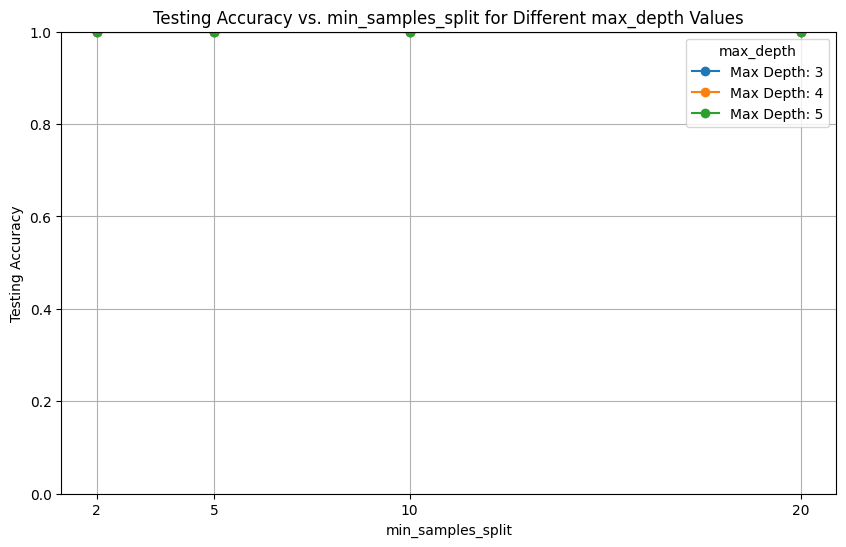

In [129]:
pivot_df = results_df.pivot(index="min_samples_split", columns="max_depth", values="accuracy")

# Create the plot
plt.figure(figsize=(10, 6))
for max_depth in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[max_depth], marker='o', label=f'Max Depth: {max_depth}')

# Customize the plot
plt.title('Testing Accuracy vs. min_samples_split for Different max_depth Values')
plt.xlabel('min_samples_split')
plt.ylabel('Testing Accuracy')
plt.xticks(pivot_df.index)  # Set x-ticks to be the min_samples_split values
plt.ylim(0, 1)  # Assuming accuracy is a proportion between 0 and 1
plt.grid()
plt.legend(title='max_depth')
plt.show()